#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219446914

# Student name: Bui, Nhu Hoang Ha (Chloe)

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [20]:
import pandas as pd
import numpy as np

df=pd.read_csv('weather_dataset.csv')

# Assuming feature=temperature as target variable
X=df.iloc[78908: ,[1,3,4,5,6,7,8,9] ].values
y=df.iloc[78908: ,[2]].values

#Converting String object of Pericipation type to float
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# le=LabelEncoder()
# ohe=OneHotEncoder(categorical_features=[0])
# X[:,0]=le.fit_transform(X[:,0])
# X=ohe.fit_transform(X).toarray()

ct = ColumnTransformer([("precip_type", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

X=pd.DataFrame(data=X)
y=pd.DataFrame(data=y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

print("X_train.shape->",X_train.shape)
print("X_test.shape->",X_test.shape)
print("y_train.shape->",y_train.shape)
print("y_test.shape->",y_test.shape)

X_train.shape-> (13158, 9)
X_test.shape-> (4387, 9)
y_train.shape-> (13158, 1)
y_test.shape-> (4387, 1)


In [22]:
df.head()

,recording_date_time,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [23]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
significant_features=SelectKBest(score_func=f_classif,k=4)
fit=significant_features.fit(X,y.values.ravel())
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Attributes','Score']
print(featureScores)

   Attributes       Score
0           0   19.762424
1           1   19.762424
2           2  589.678495
3           3    6.259292
4           4    1.058334
5           5    1.021604
6           6    3.028996
7           7         NaN
8           8    1.836459


/Users/hoangha/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [7] are constant.
  UserWarning)
/Users/hoangha/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Higher the value of scores higher will be the dependecy of target variable with that attribute like the score of Apparent temperature with temperature is 589.678, score of pericipation type is  19.762, for humidity score is 6.259, for visibility score is 3.029 and for pressure score is 1.836. Therefore, for predicting temperature, these features are important and score of cloud_cover is 0 hence we can count it as an insignificant feature. We also have features with scores of almost 1 (wind_speed and wind_bearing) and those can also be considered as insignificant as compared to the ones mentioned above.

3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [26]:
# Considering all the features
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
train_predict=linear_model.predict(X_train)
test_predict=linear_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print('MAE on training Set=',mean_absolute_error(y_train,train_predict))
print('MAE on testing Set=',mean_absolute_error(y_test,test_predict))

MAE on training Set= 0.7055018301455152
MAE on testing Set= 0.7115532357898692


In [27]:
# Considering only significant attributes
X_significant=X.iloc[:,[0,1,2,3,6,8]].values
X_significant=pd.DataFrame(data=X_significant)

X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_significant, y, test_size = 0.25, random_state = 1)
linear_model.fit(X_sig_train, y_sig_train)
train_sig_predict=linear_model.predict(X_sig_train)
test_sig_predict=linear_model.predict(X_sig_test)

print('MAE on training Set=',mean_absolute_error(y_sig_train,train_sig_predict))
print('MAE on testing Set=',mean_absolute_error(y_sig_test,test_sig_predict))

MAE on training Set= 0.7517108496423581
MAE on testing Set= 0.7488063267219829


The MAE of both training and testing set when considering all the features are slightly lower than the MAE of training and testing set when removing non-contributing attributes.

4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

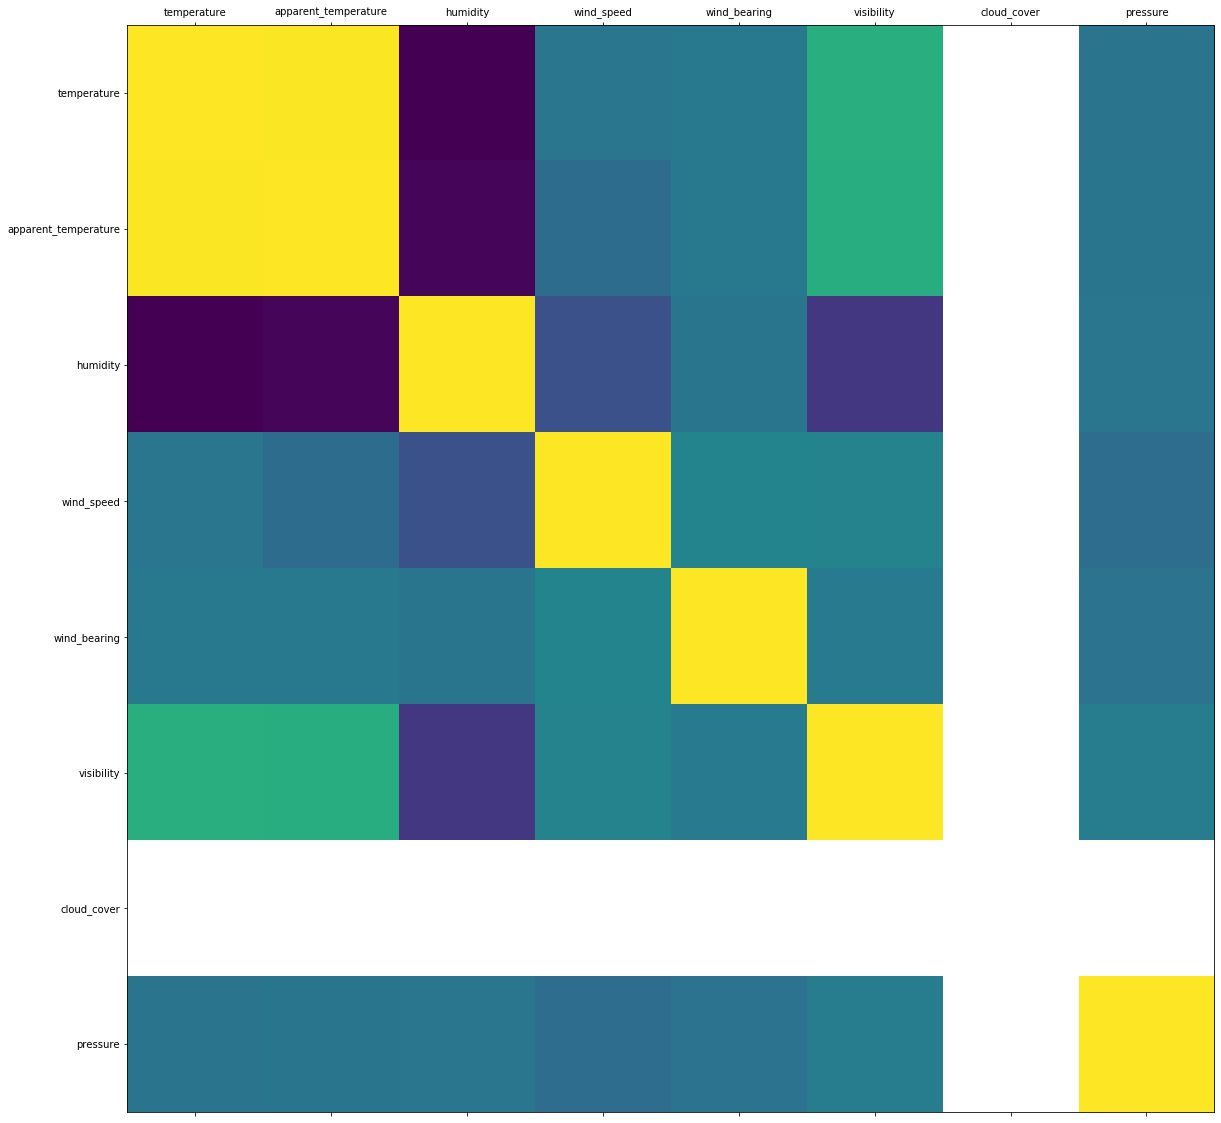

In [28]:
import matplotlib.pyplot as plt 
def plot_corr(df, size=20):
    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))# The subplots command in the background will call plt.figure(), and any keywords will be passed along
    ax.matshow(corr)   # heatmap with matshow, color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(df)

In [29]:
correlation=df.corr()
print(correlation)

                      temperature  apparent_temperature  humidity  wind_speed  \
temperature              1.000000              0.992628 -0.632253    0.008957   
apparent_temperature     0.992628              1.000000 -0.602570   -0.056649   
humidity                -0.632253             -0.602570  1.000000   -0.224951   
wind_speed               0.008957             -0.056649 -0.224951    1.000000   
wind_bearing             0.029988              0.029030  0.000735    0.103823   
visibility               0.392781              0.381658 -0.369077    0.100745   
cloud_cover                   NaN                   NaN       NaN         NaN   
pressure                -0.005447             -0.000218  0.005454   -0.049260   

                      wind_bearing  visibility  cloud_cover  pressure  
temperature               0.029988    0.392781          NaN -0.005447  
apparent_temperature      0.029030    0.381658          NaN -0.000218  
humidity                  0.000735   -0.369077        

In [10]:
# Above correlation dataframe suggests that pressure shows maximum correlation with visibility.
# Now predicting temperature using two features pressure and visibility

X_new=X.iloc[:,[6,8]].values
X_new=pd.DataFrame(data=X_new)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size = 0.3, random_state = 1)
linear_model.fit(X_new_train, y_new_train)
train_new_predict=linear_model.predict(X_new_train)
test_new_predict=linear_model.predict(X_new_test)

print('MAE on training Set=',mean_absolute_error(y_new_train,train_new_predict))
print('MAE on testing Set=',mean_absolute_error(y_new_test,test_new_predict))

MAE on training Set= 6.438456913499031
MAE on testing Set= 6.485806963165343


Clear performance variation can be observed through mean absolute error (MAE) score between the current model and one build in question 3. MAE in this model comes out to be 6.438456913499031 for trainning set and 6.485806963165343 for testing set whereas it was 0.7517108496423581 and 0.7488063267219829 for training and testing set, respectively in question 3. This is because model developed in question 3 was based on features which were significant to predict our target variable whereas in this question we build our model based on feature that has maximum correlation with pressure which is not our target variable.

5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 

In [30]:
import time
import datetime as dt
from datetime import datetime


df['Date'] = pd.to_datetime(df['recording_date_time'],utc=True)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour

X1=df.iloc[:,[1,3,4,5,6,7,8,9,11,12,13,14]].values
y1=df.iloc[:,[2]].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le=LabelEncoder()
# ohe=OneHotEncoder(categorical_features=[0])
# X1[:,0]=le.fit_transform(X1[:,0])
# X1=ohe.fit_transform(X1).toarray()

ct = ColumnTransformer([("precip_type", OneHotEncoder(), [0])], remainder = 'passthrough')
X1 = ct.fit_transform(X1)

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.6, random_state = 1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X1_train, y1_train)
train1_predict=linear_model.predict(X1_train)
test1_predict=linear_model.predict(X1_test)
print('TRAINING Score=',linear_model.score(X1_train,y1_train))
print('TESTING Score=',linear_model.score(X1_test,y1_test))

from sklearn.metrics import mean_absolute_error
print('MAE on training Set=',mean_absolute_error(y1_train,train1_predict))
print('MAE on testing Set=',mean_absolute_error(y1_test,test1_predict))

TRAINING Score= 0.9901267080741581
TESTING Score= 0.9901407708553324
MAE on training Set= 0.7412921283059758
MAE on testing Set= 0.740313432064378


  (b) Create an optimal regularised linear regression model and report the test performance.

In [12]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 0.5, normalize = True)
model_ridge.fit(X1_train, y1_train)
ytrain_predict = model_ridge.predict(X1_train)
ytest_predict = model_ridge.predict(X1_test)

print('TRAINING Score=',model_ridge.score(X1_train, y1_train))
print('TESTING Score=',model_ridge.score(X1_test, y1_test))
print('MAE on training Set=',mean_absolute_error(y1_train,ytrain_predict))
print('MAE on testing Set=',mean_absolute_error(y1_test,ytest_predict))

TRAINING Score= 0.8940993719131628
TESTING Score= 0.8942555558495825
MAE on training Set= 2.550928664055756
MAE on testing Set= 2.5572050413352208


 (c) Explain the reason behind the performance variation, if any.

- Performance Variation can be observed after using regularised linear regression model ridge. Mean absolute error of Ridge model is greater than Linear Regression model and score of Linear Regression model is greater than Ridge model.
- The reason behind the performance variation is when we include regularization after linear regression, it shrinks the parameters, therefore, it is mostly used to prevent multicollinearity (which is not the case here). Also, it reduces the model complexity by coefficient shrinkage but decreases the score and hence MAE increases.

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

Logistic Regression in a classification technique. Classification is process of classifying the categorical data 
but temperature (used as target variable in Part 1) is continous data. It cannot be divided into categories.
Therefore, for predicting temperature we need regression technique as applied above in Part 1.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [31]:
df['precip_type']=df['precip_type'].replace(['rain','snow'],['0','1'])
X2=df.iloc[:,[2,3,4,5,6,7,8,9,11,12,13,14]].values
y2=df.iloc[:,[1]].values
y2=pd.DataFrame(data=y2)
y2=y2.astype(int)


from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X2_train, y2_train.values.ravel())
THRESHOLD = 0.45
pred_y=np.where(classifier.predict_proba(X2_test)[:,1] > THRESHOLD, 1, 0)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
print(accuracy_score(y2_test,pred_y))

0.9827896046447332


/Users/hoangha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

In [33]:
cm = confusion_matrix(y2_test, pred_y)
precision,recall,fscore,support=precision_recall_fscore_support(y2_test,pred_y)
print('Precision->',precision[0])
print('Recall->',recall[0])
print('Confusion Matrix->\n',cm)

Precision-> 0.9907926184225992
Recall-> 0.9897068607882274
Confusion Matrix->
 [[25288   263]
 [  235  3150]]


As we can see the model is 99.08% precise and has a recall value of 98.97%. If we consider the confusion matrix, we can see that the total of True positive is 25288 and True negative is 3150 while the false values are just 263 and 235 which shows that our model was able to predict the True values way more than than the False values. This shows the accuracy too.

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

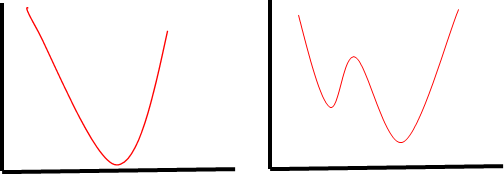





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

Figure (a) represents convex function because in convex functions we have a condition: Local Minima = Global Minima. This is satisfied in figure (a) and hence its convex while (b) is not because it has different local minima and global minima.

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

We can use Gradient Descent technique to reach the convergence point and the impact of value. It works by adjusting the weights to lower the cost of a function. We can find local minimas using this approach.


c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

Figure (b) shows a non convex function. We could have used Gradient descent if it would have been convex. But in this case, we can use Newton's method because it uses second derivative and can find global minima more accurately than Gradient descent (GD is best for local minima).

To minimize a function L(W) we follow these steps (iteratively):
W(t+1) = W(t) - H^(-1) * (derivative(L(W)))

where H is Hessian Matrix and H(i,j) being the second derivative of L(W) with W(i) and W(j).

This can be a faster method when the second derivative is known for the given function.

Alternatively, we can also use Stochastic gradient descent in order to reach the convergence point.